# **Week 0 Main Assignment**

### Read Lisan_Al_Gaib.pdf for problem description and complete the following functions

In [23]:
import time # to time the execution
import numpy as np
import matplotlib.pyplot as plt

In [24]:
### TODO 1
### Load data from data_path
### Check the input file spice_locations.txt to understand the Data Format
### Return : np array of size Nx2

def load_data(data_path):
    array =np.loadtxt(data_path,delimiter=",")
    return array

In [25]:
### TODO 2.1
### If init_centers is None, initialize the centers by selecting K data points at random without replacement
### Else, use the centers provided in init_centers
### Return : np array of size Kx2
def initialise_centers(data, K, init_centers=None):
    indices= np.random.choice(len(data),size=K,replace=False)
    centers = data[indices]
    return centers

In [26]:
### TODO 2.2
### Initialize the labels to all ones to size (N,) where N is the number of data points
### Return : np array of size N
def initialise_labels(data):
        # data=np.array(data)
        # labels = np.random.choice(list(range(data.shape[1])),size=data.shape[0],replace=False)
        # labels = np.array(labels)
        N = len(data)  # Number of data points
        labels = np.ones(N, dtype=int)
        return labels

In [27]:
### TODO 3.1 : E step
### For Each data point, find the distance to each center
### Return : np array of size NxK
def calculate_distances(data, centers):
    data_x, data_y=zip(*data)
    data_x=np.array(data_x)
    data_y=np.array(data_y)
    centers_x, centers_y=zip(*centers)
    distance_x = data_x.reshape(-1,1) - centers_x
    distance_y = data_y.reshape(-1,1) - centers_y
    distances=distance_x**2 + distance_y**2
    distances=np.sqrt(distances)
    return distances

In [28]:
### TODO 3.2 : E step
### For Each data point, assign the label of the nearest center
### Return : np array of size N
def update_labels(distances):
    min_distances = np.argmin(distances,axis=1)
    return min_distances

In [29]:
### TODO 4 : M step
### Update the centers to the mean of the data points assigned to it
### Return : np array of size Kx2
def update_centers(data, labels, K):
    new_centers =np.zeros((K,2))
    no_of_points =[0]*K
    for i in range(len(labels)):
        new_centers[labels[i]]=data[i]+new_centers[labels[i]]
        no_of_points[labels[i]]=no_of_points[labels[i]]+1
    for j in range(K):
        new_centers[j]=new_centers[j]/no_of_points[j]
    return new_centers

In [30]:
### TODO 6 : Check convergence
### Check if the labels have changed from the previous iteration
### Return : True / False
def check_termination(labels1, labels2):
    return np.array_equal(labels1,labels2)

In [31]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path:str, K:int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)    
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)

    start_time = time.time() # Time stamp 

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new
 
    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time 

In [32]:
### TODO 7
def visualise(data_path, labels, centers):
    

    # Scatter plot of the data points

    ### Set title as 'K-means clustering'
    plt.title('K-means clustering')
    ### Set xlabel as 'Longitude'
    plt.xlabel('Longitude')
    ### Set ylabel as 'Latitude'
    plt.ylabel('Latitude')
    ### Save the plot as 'kmeans.png'
    plt.savefig('kmeans.png')

    ## DO NOT CHANGE THE FOLLOWING LINE
    return plt

Time taken for the algorithm to converge: 0.0


<module 'matplotlib.pyplot' from 'c:\\Users\\anant\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\pyplot.py'>

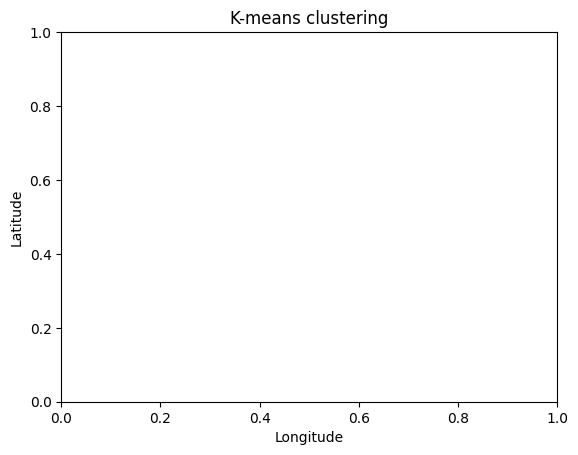

In [33]:
### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations.txt'
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)